#### Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Load the Dataset

In [2]:
sales_df = pd.read_csv('advertising.csv')

In [3]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Exploratory Data Analysis

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


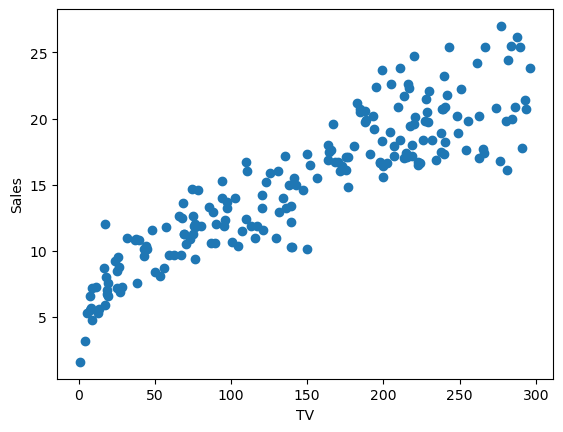

In [5]:
plt.scatter(x=sales_df['TV'],
            y=sales_df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales');

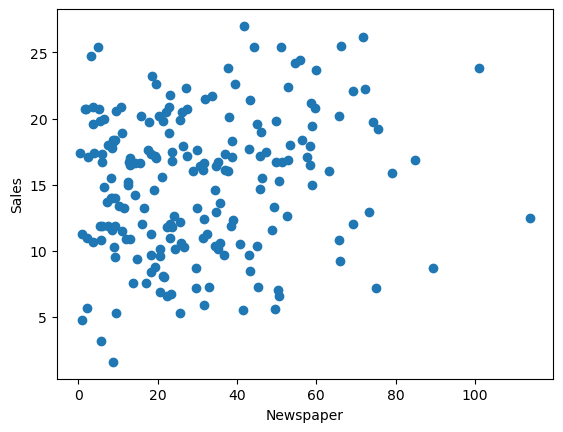

In [6]:
plt.scatter(x=sales_df['Newspaper'],
            y=sales_df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales');

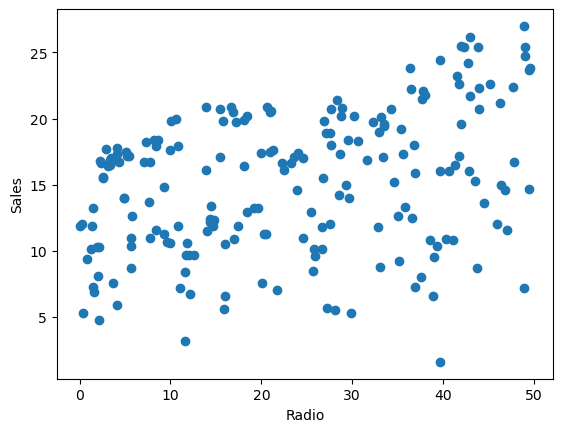

In [7]:
plt.scatter(x=sales_df['Radio'],
            y=sales_df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales');

In [22]:
sales_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


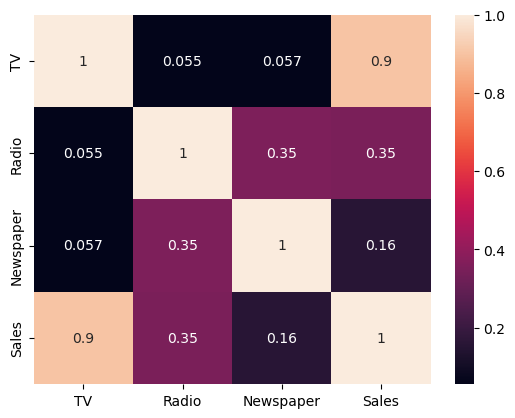

In [23]:
sns.heatmap(sales_df.corr(), annot=True);

#### Modelling

##### Feature Selection

In [8]:
X = sales_df[['TV']] # Feature
y = sales_df[['Sales']] # Target


#### Split the Data

In [9]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=42)

##### Instantiate Model

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [13]:
test_accuracy = mean_absolute_error(y_test, y_test_pred)
train_accuracy = mean_absolute_error(y_train, y_train_pred)

In [14]:
print(f"Train Data Accuracy: {train_accuracy}")
print(f"Test Data Accuracy: {test_accuracy}")


Train Data Accuracy: 1.8461456115370294
Test Data Accuracy: 1.8069123776641516


### Modelling with StatsModel

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [34]:
# Lets get an intercept
X = sm.add_constant(X)

In [35]:
# Fitting the Ordinary Least Squares Regression Model
sm_model = sm.OLS(y, X).fit()

In [29]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           7.93e-74
Time:                        21:25:05   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [36]:
# Make predictions
sm_predictions = sm_model.predict(X)

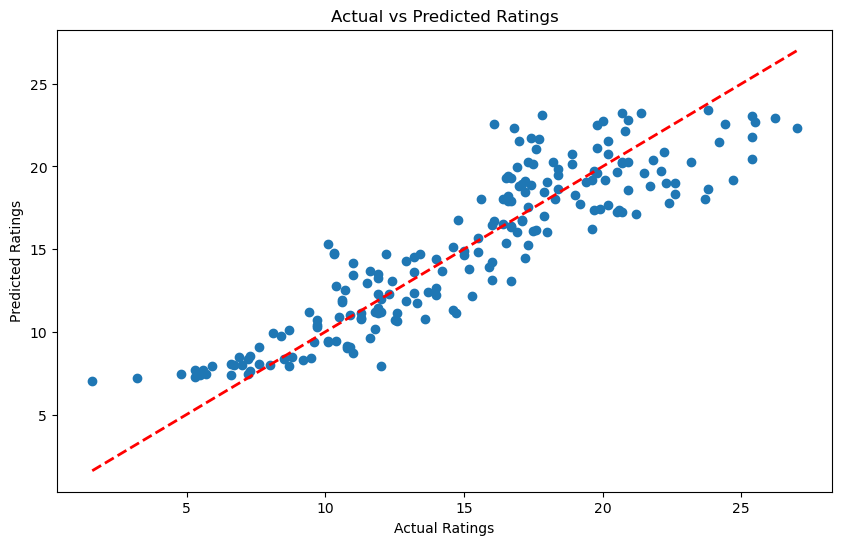

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y, sm_predictions)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.show()

In [32]:
formula = 'Sales ~ TV'
model_formula = ols(formula=formula, data=sales_df).fit()
print(model_formula.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           7.93e-74
Time:                        21:27:18   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.0

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

  feature      VIF
0   const  3.94808
1      TV  1.00000
